<a href="https://colab.research.google.com/github/samia-boubaya/project-01-escape-room-game/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PROJECT 01: ESCAPE ROOM GAME** - IRONHACK DATA ANALYTICS

Welcome to escape room quest

You wake up in a couch in a misteryous house with locked doors.
Your mission: Find the keys, unlock each room, and escape to freedom!

In this notebook we start by building the data structures that define the game world, which are: rooms, objects, keys and doors.

**Definition of an escape room:**

The briefing room of an escape room in Tampere, Finland
Escape rooms are inspired by escape room video games, live-action role-playing, point-and-click adventure games, puzzle hunts, interactive theater, and haunted houses. They are also referred to as "room escapes", "escape games", "exit games", or "live escapes".


------
------
------
------

# **FINAL GAME PRODUCT**

----
## **ALL EXTRA FEATURES:**

----
✅ GAME TRIGGERS (RODRIGO) 

✅ CLOCK | COUNTDOWN (SAMIA) 

✅ HEALTH (REYNOLD) 

✅ TAKE A BREAK (PAULINA)

----

---
## **DATA:**


#### LISTS: ACTIONS, SPACES, ITEMS, DOORS, KEYS

In [15]:
# LIST : actions available to a player
actions = ['explore', 'examine', 'unlock door', 'navigate', 'restart', 'quit','play']
print("Player's actions in the game :",actions)

# LIST : spaces
spaces = ['game room', 'bedroom 1', 'bedroom 2', 'living room','outside']
print("\nSpaces in the game :",spaces)

# LIST : items
items = ['couch', 'piano', 'queen bed', 'double bed', 'dresser', "dining table"]
print("\nItems in the game :",items)

# LIST : doors
doors = ['door A', 'door B', 'door C', 'door D']
print("\nDoors in the game :",doors)

# LIST : keys
keys = ['key door A', 'key door B', 'key door C', 'key door D']
print("\nKeys in the game :",keys)


Player's actions in the game : ['explore', 'examine', 'unlock door', 'navigate', 'restart', 'quit', 'play']

Spaces in the game : ['game room', 'bedroom 1', 'bedroom 2', 'living room', 'outside']

Items in the game : ['couch', 'piano', 'queen bed', 'double bed', 'dresser', 'dining table']

Doors in the game : ['door A', 'door B', 'door C', 'door D']

Keys in the game : ['key door A', 'key door B', 'key door C', 'key door D']


#### DICT : GAME AREAS

In [16]:
# Each key in this dictionary represents a room; each value is a list of objects, doors and keys

# Dictionary : GAME AREAS
game_areas = {
    "game room" : ['couch', 'piano', 'door A', 'key door A'],
    "bedroom 1": ['queen bed', 'door A', 'door B', 'door C', 'key door B'],
    "bedroom 2": ['double bed', 'door B', 'dresser', 'key door D', 'key door C'],
    "living room": ["dining table", 'door C', 'door D'],
    "outside": ["freedom"]
}

# List : dictionary Keys
spaces = game_areas.keys()
print("GAME AREAS Dictionary:")
print("Dictionary Keys:\n",spaces,"\n")

# Print dictionary organised
print("Dictionary:\n{   key   :   value     }")
for i in spaces:
  print(i,":",game_areas[i])

GAME AREAS Dictionary:
Dictionary Keys:
 dict_keys(['game room', 'bedroom 1', 'bedroom 2', 'living room', 'outside']) 

Dictionary:
{   key   :   value     }
game room : ['couch', 'piano', 'door A', 'key door A']
bedroom 1 : ['queen bed', 'door A', 'door B', 'door C', 'key door B']
bedroom 2 : ['double bed', 'door B', 'dresser', 'key door D', 'key door C']
living room : ['dining table', 'door C', 'door D']
outside : ['freedom']


----
## ***EXTRA FEATURES COMBINED***

----
#### MUST INSTALL & DEFINE EXTRA FEATURES FUNCTIONS

In [17]:
!pip install pillow
!pip install playsound==1.2.2
!pip install pyobjc

  Using cached pyobjc-12.0-py3-none-any.whl.metadata (26 kB)
  Using cached pyobjc_core-12.0.tar.gz (991 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [2 lines of output]
      running egg_info
      error: PyObjC requires macOS to build
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [18]:
import os
import time
import threading
import platform
from PIL import Image
from IPython.display import display, clear_output
import requests
import hashlib
from datetime import datetime, timedelta
import sys

try:
    from playsound import playsound
except ImportError:
    raise ImportError("Please install playsound with: pip install playsound==1.2.2")

# =============================================
# ⚙️ GAME STATE
# =============================================
# Dictionary : GAME STATE
game_state = {
    'space path' : [], # player current space to navigate and make a space path
    'item path' : [], # to select an item to examine for key; and make an item path
    'door path': [], # to select a door in currentspace and track unlocked doors already and locked ones
    'inventory': [], # to store found keys
    'play time': 0, # import library time for time limit max 40min
    'health': 100, # health scores whenever the countdown repeats we lose 25 points

}

total_play_time = 0
BANNER_WIDTH = 70

# =============================================
# ⚙️ TRIGGERS CONFIGURATION
# =============================================
TRIGGERS = {
    "space": {
        "sound": "https://drive.google.com/uc?export=download&id=1TH3ssE0tVnfKySil0q55grCoiFpCxFO7",
        "image": "https://drive.google.com/uc?export=download&id=1LjUpXnqjCmpvhJZ8iXk-3d1qXR-plCPA",
    },
    "examine": {
        "sound": "https://drive.google.com/uc?export=download&id=1_FbFeK51rtIMWg9yQovpurNGHHWukYoD",
        "image": "https://drive.google.com/uc?export=download&id=1igPXeO1Ro-UUL1tMQsMAQqOZE1kPundT",
    },
    "found key": {
        "sound": "https://drive.google.com/uc?export=download&id=1MhGR7E9YXp7LrzKaSMlCGd211I18P6Iy",
        "image": "https://drive.google.com/uc?export=download&id=1hcyiCkmmchsGZ2ERsx8PMdEN3kh--tO5",
    },
    "not found key": {
        "sound": "https://drive.google.com/uc?export=download&id=17v52HWgz_jCHFITeCV1oyOOC4TV_gyzT",
        "image": "https://drive.google.com/uc?export=download&id=1UV-xsA9ipAuN6SwhcBCvtET9nDM4YRal",
    },
    "door locked": {
        "sound": "https://drive.google.com/uc?export=download&id=1-BwRmk_3U6TRESsPja5s26ECB8GYcqOU",
        "image": "https://drive.google.com/uc?export=download&id=1drL22OHO91OgjpT942g2nrmgRZcr0gYa",
    },
    "quiz": {
        "sound": "https://drive.google.com/uc?export=download&id=1wbj__J8nYqmeOh1gCmZVaWWqMbF4MNyp",
        "image": "https://drive.google.com/uc?export=download&id=1vYJV2WLgFkuDbXaITMFshGfabjs1A2Qs",
    },
    "door unlocked": {
        "sound": "https://drive.google.com/uc?export=download&id=16bhcdxVRzIRmNO0ztLaeQZYHBLPVlB8P",
        "image": "https://drive.google.com/uc?export=download&id=1TXSjKZXC_K0c4gXrQlTY20u_X2aEVQ1_",
    },
    "footstep": {
        "sound": "https://drive.google.com/uc?export=download&id=1mlkfF9RW6uhKMeBqixYZlo5w-dVJ_1Uo",
        "image": "https://drive.google.com/uc?export=download&id=16snfruJnkMN8fkxL_fxDzwCaNhNdRroN",
    },
    "outside": {
        "sound": "https://drive.google.com/uc?export=download&id=13vxJyjMuAz0hHfoaqLIrmOEbf5IN8BGW",
        "image": "https://drive.google.com/uc?export=download&id=1fVIHmH3PCfJVposo9749Sgo4q5dLwQea",
    },
}

os.makedirs("cache", exist_ok=True)

# =============================================
# 🧠 UTILITIES
# =============================================

def download_file(url: str, name: str) -> str | None:
    """Download file if not cached."""
    _, ext = os.path.splitext(name.lower())
    subfolder = "sounds" if ext in [".mp3", ".wav", ".ogg"] else "images"
    target_dir = os.path.join(os.getcwd(), "assets", subfolder)
    os.makedirs(target_dir, exist_ok=True)

    url_hash = hashlib.md5(url.encode()).hexdigest()[:8]
    base, ext = os.path.splitext(name)
    unique_name = f"{base}_{url_hash}{ext}"
    local_path = os.path.join(target_dir, unique_name)

    if os.path.exists(local_path):
        return local_path

    print(f"⬇️ Downloading {name} → {target_dir}/")
    try:
        response = requests.get(url, timeout=15)
        response.raise_for_status()
        with open(local_path, "wb") as f:
            f.write(response.content)
        return local_path
    except Exception as e:
        print(f"⚠️ Download error: {e}")
        return None

# =============================================
# 🔊 SOUND PLAYER
# =============================================
_event_lock = threading.Lock()

def _play_once(path):
    if platform.system() == "Darwin":
        os.system(f"afplay '{path}' >/dev/null 2>&1")
    elif platform.system() == "Linux":
        os.system(f"mpg123 '{path}' >/dev/null 2>&1")
    else:
        playsound(path, block=True)

def play_sound(url: str, trigger_name: str, loop_duration: int = None, ambient=False):
    local_file = download_file(url, f"{trigger_name}.mp3")
    if not local_file:
        return

    def _play():
        try:
            start = time.time()
            while True:
                if not ambient:
                    with _event_lock:
                        _play_once(local_file)
                else:
                    _play_once(local_file)

                if not loop_duration or (time.time() - start > loop_duration):
                    break
        except Exception as e:
            print(f"⚠️ Sound error: {e}")

    threading.Thread(target=_play, daemon=True).start()

# =============================================
# 🖼️ IMAGE DISPLAY
# =============================================
def show_image_inline(url: str, display_time: int = 5000):
    if not url:
        return
    try:
        local_file = download_file(url, "image.gif")
        if not local_file:
            return
        img = Image.open(local_file)
        img = img.resize((400, 300), Image.Resampling.LANCZOS)
        display(img)

        def safe_clear():
            try:
                clear_output(wait=True)
            except LookupError:
                pass
        threading.Timer(display_time / 1000, safe_clear).start()
    except Exception as e:
        print(f"Image error: {e}")

# =============================================
# 🚀 MERGED TRIGGER FUNCTION
# =============================================
def trigger_event(trigger_name: str, display_time: int = 5000):
    """Handles messages, state updates, images, and sounds."""
    trigger_name = trigger_name.lower().strip()
    
    # State messages
    messages = {
        "space": "\n🚀 You move to a new space!",
        "examine": "\n🔍 You examine the item...",
        "found key": "\n🗝️ You found a key!",
        "not found key": "\n❌ Not found key here...",
        "door locked": "\n🚪 The door is locked.",
        "quiz": "\n❓ A quiz challenge appears!",
        "footstep": "\n👣 You hear footsteps nearby...",
        "outside": "\n🌳 You step outside."
    }
    print(messages.get(trigger_name, f"\n⚠️ Unknown trigger: {trigger_name}"))


#######################################################################################

    # Play visuals and sound
    data = TRIGGERS.get(trigger_name)
    if data:
        if data.get("sound"):
            play_sound(data["sound"], trigger_name)
        if data.get("image"):
            show_image_inline(data["image"], display_time)

# =============================================
# 🛡️ HEALTH SYSTEM
# =============================================
def print_banner(health):
    def center_line(text):
        padding = (BANNER_WIDTH - 2 - len(text)) // 2
        return f"{' ' * padding}{text}{' ' * (BANNER_WIDTH - 2 - len(text) - padding)}"
    
    print("-" * BANNER_WIDTH)
    if health == 100:
        print(center_line("💪 You feel strong!"))
        print(center_line("Ready to face the next challenge!"))
    else:
        print(center_line("TIME'S UP! Restarting countdown..."))
    print(center_line(f"Current Health: {health}"))
    print("-" * BANNER_WIDTH)

def update_health():
    game_state['health'] = max(game_state['health'] - 25, 0)

def restore_health():
    if game_state['health'] == 0:
        choice = input("💉 Health is 0! Restore to 100? (y/n): ").strip().lower()
        if choice == 'y':
            game_state['health'] = 100
            print("❤️ Health restored to 100!")
            return True
        else:
            print("☠️ Game over.")
            return False
    return True

# =============================================
# ⏳ COUNTDOWN
# =============================================
def start_countdown(minutes):
    global total_play_time
    end_time = datetime.now() + timedelta(minutes=minutes)
    
    while datetime.now() < end_time:
        now = datetime.now()
        remaining = end_time - now
        mins, secs = divmod(int(remaining.total_seconds()), 60)
        print(f"\r🕰️ {now.strftime('%H:%M:%S')} | ⏳ {mins:02}:{secs:02}", end="")
        time.sleep(0.1)
    
    print("\r🕰️ Time's up!               ")
    update_health()
    total_play_time += minutes
    print_banner(game_state['health'])
    return restore_health()

# =============================================
# 🎮 MAIN FUNCTION
# =============================================
def play_game(countdown_minutes, trigger, image_minutes=1):
    """Play one full session with countdown and image display duration."""
    #print(f"\n🎮 Starting game with trigger '{trigger}' for {countdown_minutes} min\n")
    trigger_event(trigger, display_time=int(image_minutes * 60 * 1000))
    if not start_countdown(countdown_minutes):
        return
    #print(f"\n✅ Session finished for trigger '{trigger}'!\n")

# =============================================
# 🟢 RUN TESTS
# =============================================
#if __name__ == "__main__":
    
    # trigger='space' (5 minutes) # still not doing 5min
    #play_game(countdown_minutes=5, trigger='space', image_minutes=5)
    
    # trigger='examine' (6 seconds)
    #play_game(countdown_minutes=0.1, trigger='examine', image_minutes=0.1)
    
    # trigger='not found key' (6 seconds)
    #play_game(countdown_minutes=0.1, trigger='not found key', image_minutes=0.1)

    # trigger='found key' (6 seconds)
    #play_game(countdown_minutes=0.1, trigger='found key', image_minutes=0.1)
    
    # trigger='door locked' (6 seconds)
    #play_game(countdown_minutes=0.1, trigger='door locked', image_minutes=0.1)

    # trigger='door unlocked' (6 seconds)
    #play_game(countdown_minutes=0.1, trigger='door unlocked', image_minutes=0.1)
    
    # trigger='footstep' (6 seconds)
    #play_game(countdown_minutes=0.1, trigger='footstep', image_minutes=0.1)

    # trigger='outside' (6 seconds)
    #play_game(countdown_minutes=0.1, trigger='outside', image_minutes=0.1)
    

---
## ***PLAYER_INPUT = ?***

#### FUNCTION : EXPLORE (space) ✅ return LIST OF ITEMS

In [19]:
def explore(space: str):
    space_items = []
    trigger_event("space") # 6 seconds
    print(f"You are exploring {space}. You see these items:")
    
    for item in items:
        print("-", item,"\n")
        space_items.append(item)
    return space

# FUNCTION : CHECK (item, key) ✅
#check for key in selected item in current space
# We use this function inside examine() to check inventory if there is a key  or not 
def check(select_item, key):
    #if found key and not in inventory then update inventory
    if ( key!='' and key not in game_state['inventory'] ): 
        print(f'You found {key} in {select_item}')
        trigger_event('found key')
        result = True
    #elif not found key
    elif key=='not found key':
        print(f"You didn't find any key in {select_item}")
        trigger_event('not found key')
        result=False
    #else key in inventory
    elif key in game_state['inventory']: 
        print(f'You already have the key in your inventory {game_state["inventory"]}') 
        player_input=print(f"Here is a list of actions {actions}\n Input your move:").lower() 
    return result # returns a list of items in space

#### FUNCTION : EXAMINE (space) ✅ return TRUE or False depends on found key or not found key

In [20]:
def examine(space: str):
    # We show a list of items in space
    print(f"Here's a list of items in {space}:", explore(space))    
    # We select an item in space
    select_item = input("Select an item to examine: ").lower()  # select an item to examine
    trigger_event("examine") # trigger without text
    print(f'Examining the {select_item} carefully...')
    
    #### ITEMS in SPACE ############################################
    
    # GAME ROOM ITEMS
    if select_item == 'couch':
        key = 'not found key'
        result_examine = check(select_item, key)

    elif select_item == 'piano':
        key = 'key door A'
        result_examine = check(select_item, key)

    # BEDROOM 1 ITEM
    elif select_item == 'queen bed':
        key = 'key door B'
        result_examine = check(select_item, key)
    
    # BEDROOM 2 ITEMS
    elif select_item == 'double bed':
        key = 'key door C'
        result_examine = check(select_item, key)

    elif select_item == 'dresser':
        key = 'key door D'
        result_examine = check(select_item, key)

    # LIVING ROOM ITEMS
    elif select_item == 'dinning table':
        key = 'not found key'
        result_examine = check(select_item, key)

    # Re-INPUT
    else:
        print("Value ERROR! Invalid item. ")
        examine(space)  # allows the user to try again safely
    
    # UPDATE ITEM PATH #########################################################
    game_state['item path'].append(select_item)
    
    # IF FOUND KEY UPDATE INVENTORY ############################################
    if result_examine == True:
        game_state['inventory'].append(key)
    # NOT FOUND KEY
    else:
        return result_examine # return boolean

#### FUNCTION : UNLOCK DOOR (inventory, action, space, door) ✅ return True or False door unlocked or door locked

In [21]:
def unlock_door(inventory: list, action: str, space: str, door: str):
    # simulate global variables for testing
    global game_state, doors  

    test_result = False

    while action not in ['quit', 'restart']:  # Correct way to check this condition
        inventory_check = False

        # check if inventory contains a key matching the door
        for key in inventory:
            if door.lower() in key.lower():
                inventory_check = True
                print(f"Key already in inventory for {door}...")                
                break

        if inventory_check:
            print(f"You used the key to unlock {door}.")
            game_state['inventory'].append(door)
            test_result = True
        else:
            print(f"The {door} is locked. You need a matching key.")
            trigger_event('door locked')
            test_result = False

        if door in doors and space:
            print(f'You chose to unlock {door} in {space}.')
            door = input("Enter the door you want to try to unlock: ").lower()

        return test_result  # exit after one attempt


#### FUNCTION : QUIZ (inventory, door) ✅

In [22]:
# quiz(inventory, door)

def quiz(inventory: list, door:str):
    # Quiz function to unlock doors
    for key in inventory:
        if door in inventory:
            print(f"You have the key to {door} in your inventory ~ you can proceed to unlock!")
            trigger_event("quiz")
            print(f"\n...  Trick or treat answer this quiz to unlock {door}!")
            
            # QUIZ(inventory, door)  #######################################################################################################################
            
            # quiz(game_state[inventory], 'door A')
            if door == 'door A': 
                
                print("Question: What is the primary function of Door A, as suggested by its location in the floor plan?")
                print("A) To access the outdoors.")
                print("B) To provide entry or exit to a specific room.")
                print("C) To serve as a decorative element.")

                answer = input("Enter your choice (A, B, or C): ").upper()
                print(f"You chose the answer: {answer}")
                if answer == "B":
                    print("Correct! Door A is most likely for entering or exiting a room.")
                    trigger_event('door unlocked')
                    quiz_answer=True # return true to finally unlock door
                    return quiz_answer
                else:
                    print("\Incorrect. Try another time!")
                    quiz_answer=False
                    player_action('play') # call main function
                    
            # quiz(game_state[inventory], 'door B')
            elif door == 'door B': 
                print("Question: Considering the layout, which room is Door B most likely connected to?")
                print("A) The Game Room")
                print("B) Bedroom 1")
                print("C) The Outdoors")

                answer = input("Enter your choice (A, B, or C): ").upper()
                if answer == "B":
                    print("Correct! Based on the plan, Door B likely leads to Bedroom 1.")
                    quiz_answer=True # return true to finally unlock door
                    return quiz_answer
                else:
                    print("\nIncorrect. Try another time!")
                    trigger_event('door unlocked')
                    quiz_answer=False
                    player_action('play') # call main function
                    
            # quiz(game_state[inventory], 'door C')
            elif door == 'door C':
                print("Question: If you wake up on the couch, and the key to Door C is found nearby, what is the most logical room Door C leads to, considering the floor plan?")
                print("A) The Game Room")
                print("B) Bedroom 2")
                print("C) The Outdoors")
                
                answer = input("Enter your choice (A, B, or C): ").upper()
                if answer == "C":
                    print("Correct! It makes sense that Door C might lead outside.")
                    quiz_answer=True # return true to finally unlock door
                    return quiz_answer
                else:
                    print("\nIncorrect. Consider the layout again!")
                    trigger_event('door unlocked')
                    quiz_answer=False
                    player_action('play') # call main function
            
            # quiz(game_state[inventory], 'door D')
            elif door == 'door D': 
                print("Question: Considering the floor plan, and the fact you woke up on the couch, where is Door D most likely located?")
                print("A) In the Game Room")
                print("B) In Bedroom 1")
                print("C) Not visible on the plan")

                answer = input("Enter your choice (A, B, or C): ").upper()
                if answer == "C":
                    print("Correct! Since Door D isn't shown, it's not visible on the plan.")
                    quiz_answer=True # return true to finally unlock door
                    return quiz_answer
                else:
                    print("\nIncorrect. Maybe Door D is a secret door?")
                    trigger_event('door unlocked')
                    quiz_answer=False
                    player_action('play') # call main function
                    
            #####################################################################################################################################
    return quiz_answer


#### PLAYER_INPUT = NAVIGATE ✅

In [23]:
def navigate(space, door):
    """Move from one space to another through a door if possible."""
    print(f"\nNavigating through {door}...")

    # Validate that both the space and door exist in the game world
    if door not in doors or space not in spaces:
        print("Invalid door or space!")
        player_action('play')
        return

    # Check if door was already unlocked
    if door not in game_state['door path']:
        print(f"The {door} is locked. You need to unlock it first!")
        return

    # Determine possible connections based on game_areas
    for next_space, contents in game_areas.items():
        if door in contents and next_space != space:
            game_state['space path'].append(next_space) # update_space_path(next_space)
            print(f"You have moved from {space} to {next_space}!")
            return

    print(f"You navigated through {door} to {new_space}")


#### FUNCTIONs : UPDATE GAME STATE ✅

In [24]:
# UPDATE GAME STATE PATH #####################################################

# update space path [game room, bedroom 1, bedroom 2...]
#def update_space_path(space:str, trigger_name:str):
#   if trigger_name == "footstep":
#        game_state['space path'].append(space)
#        return game_state['space path']
    

def update_space_path(space:str):
    # space is new_space
    while True: # While loop
        if ('door A' in space) and ('door B' not in space) and ('door C' not in space) and ('door D' not in space):
            update_space_path('game room')

        elif ('door A' in space) and ('door B' in space) and ('door C' in space) and ('door D' not in space):
            update_space_path('bedroom 1')
        
        elif ('door A' not in space) and ('door B' in space) and ('door C' not in space) and ('door D' not in space):
            update_space_path('bedroom 2')
        
        elif ('door A' not in space) and ('door B' not in space) and ('door C' in space) and ('door D' in space):
            update_space_path('living room')
        
        elif ('door A' not in space) and ('door B' not in space) and ('door C' not in space) and ('door D' in space):
            update_space_path('outside')
            print("FREEDOM | YOU WIN !")
            print(game_state)
            break
        else:
            print("UNKNOWN SPACE in the system?")
            
        print(f'You are now in {space}')
        update_space_path(space)



# update item path [couch, piano, queen bed...]
def update_item_path(item:str):
    game_state['item path'].append(item)
    return game_state['item path']

# update inventory [key door A, key door B, key door C...]
def update_inventory(key:str):
    game_state['inventory'].append(key)
    return game_state['inventory']

# update door path [door A, door B, door C, ...]
def update_door_path(door:str):
    game_state['door path'].append(door)
    return game_state['door path']


    
# UPDATE GAME STATE #####################################################
def update_game_state(space, item, key, door):
    update_space_path(space) # update space
    update_item_path(item) # update item
    update_inventory(key) # update key
    update_door_path(door) # update door

#### FUNCTION = RESTART() ✅

In [25]:

#FUNCTION : RESET_GAME
def reset_game():
    answer = input("Do you want to restart the game? Enter: YES or NO")
    while answer !='YES' and answer!='NO':
        answer = input("To restart Enter only : YES or NO")
    
    if answer.low() == 'yes':
        print("Restarting the game...")
        game_state["space path"].clear()
        game_state["item path"].clear()
        game_state["inventory"].clear()
        game_state["door path"].clear()
    elif answer.low() == 'no':
        print("Continue to play...")
        player_action('play')
    else:
        print("Value Error: Enter YES or NO")

    return game_state


def restart():
    reset_game()

#### PLAYER_INPUT = QUIT() ✅

In [26]:

def quit():
    print("Quitting the game...")
    game_state.clear
    breakpoint

----
## **GAME PLAY DEMO**

----
## **def MAIN FUNCTION = PLAYER_ACTION(PLAYER_INPUT)**

In [27]:
def player_action(player_input: str):
    while True:
        game_action = player_input
        start_space = 'game room'
        space = start_space
        game_state['space path'].append(start_space) #initializing start space
        # Invalid input → show available actions and ask again
        if game_action not in actions:
            print(f'\nInvalid action! Please choose one of the following:{actions}')
            player_input = input("Enter your action: ").lower()
            continue
        
        # Quit the game
        if game_action == 'quit':
            print(f"\nPlayer inputs the action: {game_action}")
            print("Quitting the game. Goodbye!")
            break

        # Restart the game
        elif game_action == 'restart':
            print(f"\nPlayer inputs the action: {game_action}")
            print("Game restarting!")
            player_input = 'play'
            continue  # Restart goes back to play automatically

        # Play the game
        funnel_actions=['explore','examine','unlock door', 'navigate']
        if game_action == 'play' or funnel_actions:
            print(f"\nPlayer inputs the action: {game_action}")
            print("Starting the game...")
            game_state['space path'].append('game room')
            trigger_event('space')

            # ADD GAME ACTIONS FUNNEL
            action = input("ENTER YOUR NEXT MOVE: ")
            print(f"Performing action: {game_action}")
            space='game room'
            while action in actions:
                action = input("INPUT YOUR ACTION HERE: ")
                if action == 'explore':
                    if __name__ == "__main__":
                        # trigger='space' (5 minutes) # still not doing 5min
                        play_game(countdown_minutes=5, trigger='space', image_minutes=5)
                        explore(space)
                        
                
                elif action == 'examine':
                    examine(space)
                    player_input('play')

                elif action == 'unlock door':
                    door=input("Select the door you want to try unlock:")
                    inventory=game_state['inventory']
                    unlock_door(inventory, action, space, door)
                    player_input('play')
                    
                elif action == 'navigate':
                    door=input("Select the door to navigate through:")
                    print(f"list of doors to unlock",{doors in space})
                    navigate(space, door)
                    player_input('play')


🔍 You examine the item...


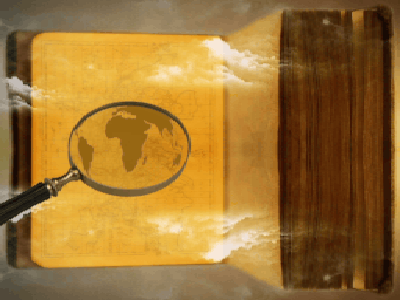

Examining the  carefully...
Value ERROR! Invalid item. 

🚀 You move to a new space!


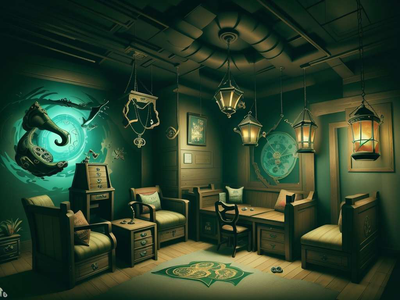

You are exploring game room. You see these items:
- couch 

- piano 

- queen bed 

- double bed 

- dresser 

- dining table 

Here's a list of items in game room: game room

🔍 You examine the item...


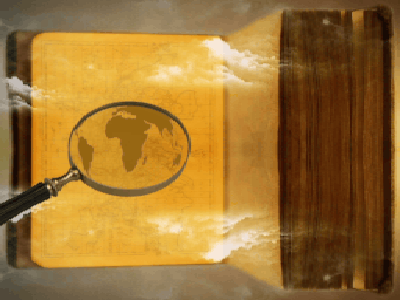

Examining the  carefully...
Value ERROR! Invalid item. 

🚀 You move to a new space!


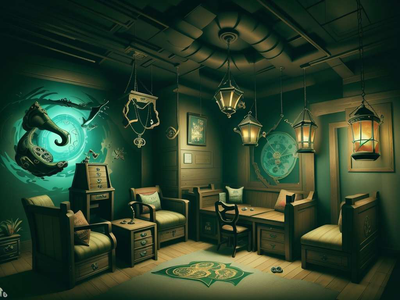

You are exploring game room. You see these items:
- couch 

- piano 

- queen bed 

- double bed 

- dresser 

- dining table 

Here's a list of items in game room: game room


In [ ]:
# Big "Time's Up" banner
print("\n" + "*"*70)
print("*****         WELCOME TO THE ESCAPE ROOM GAME!         *****")
print("*****               Made by POSH SPICE                 *****")
print("*"*70)

# Start the game by printing storyline message and initial game state
print('''
You wake up on a couch and find yourself in a strange house...
With no windows which you have never been to before.
You don't remember why you are here and what had happened before. 
You feel some unknown danger is approaching and you must get out of the house, NOW!
          ''')

game_state['health']=100

# BANNER 
print("-" * BANNER_WIDTH)
print(("Welcome to the challengen brave one!"))
print(f"Current Health: {game_state['health']}")
print("-" * BANNER_WIDTH)

if __name__ == "__main__":
    
    #trigger='space' (5 minutes) # still not doing 5min
    play_game(countdown_minutes=0.25, trigger='space', image_minutes=0.25)

player_input=input(f" Choose an action from this list: {actions}")
if player_input not in actions:
    while player_input not in actions:
        player_input=input(f" Choose an action from this list: {actions}")

player_action(player_input)